In [ ]:
# pip install contextily

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import contextily as ctx
import numpy as np

# Define bounding box of Bali
minx, miny = 114.403381, -8.853592  # Southwest corner
maxx, maxy = 115.716248, -8.035842  # Northeast corner

# Define patch size in km
patch_km = 1 # 1 km x 1 km patches

# Approximate degree size for 20 km tiles
deg_per_km_lat = 1 / 111.32  # degrees per km latitude
deg_per_km_lon = 1 / (111.32 * np.cos(np.radians(miny)))  # adjusted for latitude

delta_lat = patch_km * deg_per_km_lat
delta_lon = patch_km * deg_per_km_lon

# Generate patches
patches = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        patch = box(x, y, x + delta_lon, y + delta_lat)
        patches.append(patch)
        y += delta_lat
    x += delta_lon

# Create GeoDataFrame
patches_gdf = gpd.GeoDataFrame({'geometry': patches}, crs='EPSG:4326')

In [22]:
# Load Bali land shapefile and ensure same CRS
bali_land = gpd.read_file('../data/masks/bali_merged.geojson')
bali_land = bali_land.to_crs(patches_gdf.crs)

# Filter patches intersecting with land
patches_on_land = gpd.sjoin(patches_gdf, bali_land, how='inner', predicate='intersects')
patches_on_land = patches_on_land.drop(columns='index_right')

# Convert to Web Mercator for plotting
patches_on_land = patches_on_land.to_crs(epsg=3857)

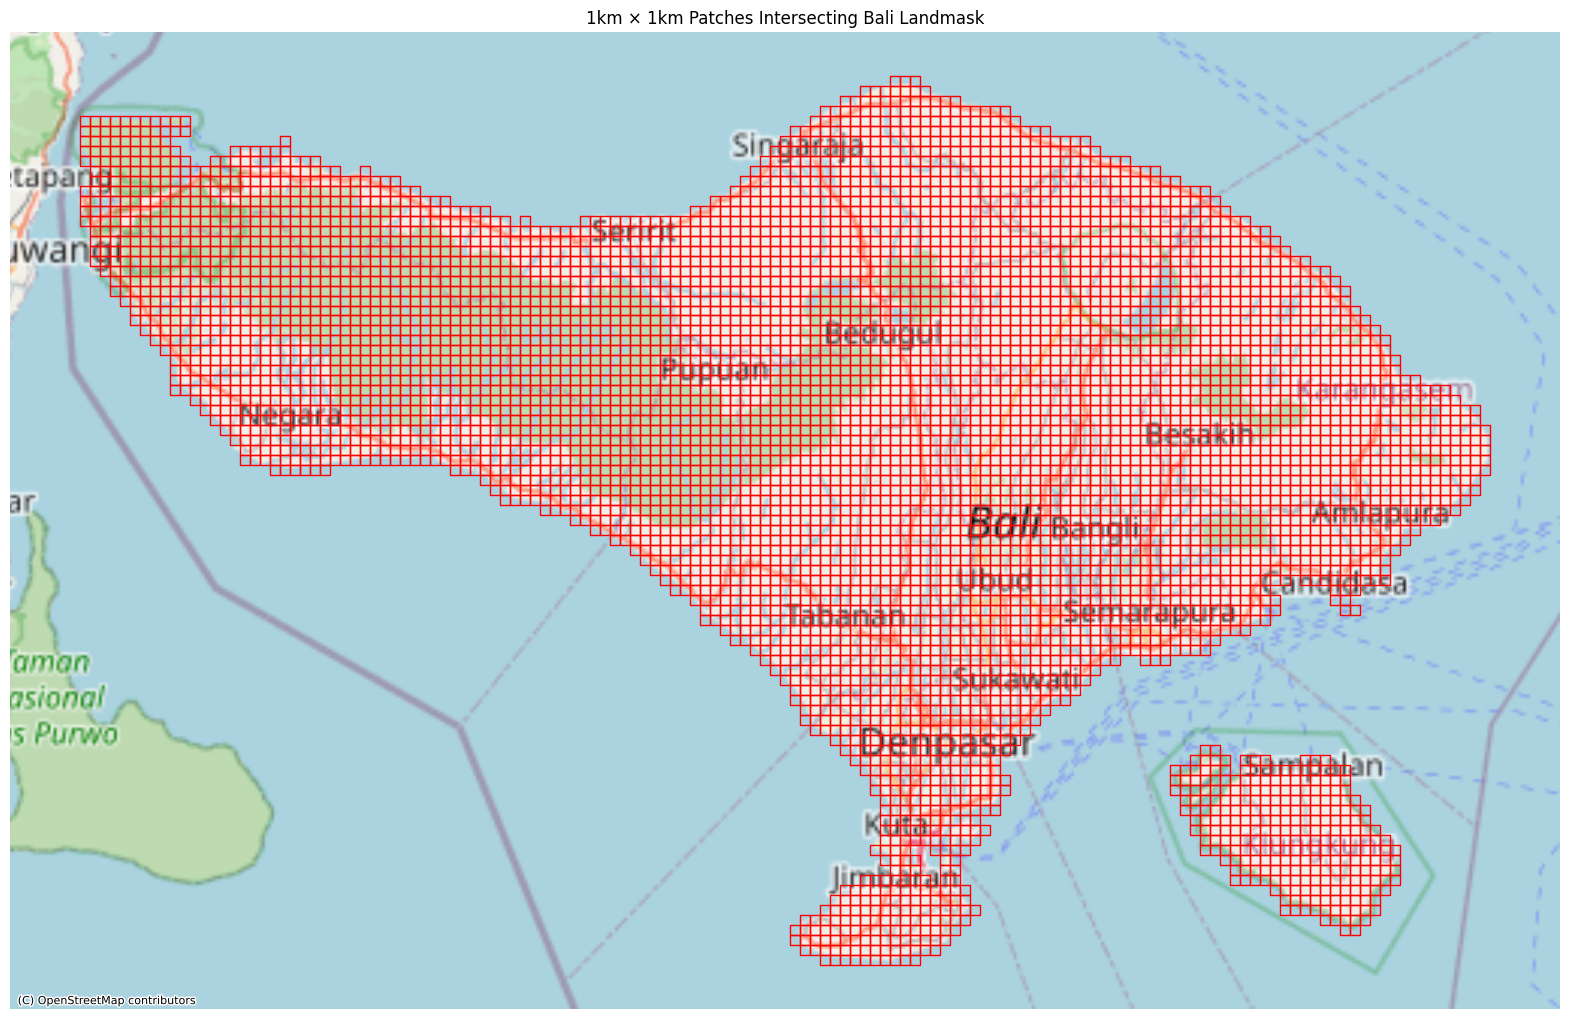

In [25]:
# Plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the patches
patches_on_land.plot(ax=ax, facecolor='none', edgecolor='red')

# Plot the land mask
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Plot Decorations
ax.set_axis_off()
plt.title(f"{patch_km}km × {patch_km}km Patches Intersecting Bali Landmask")
plt.show()